In [1]:
source("../../../paths.R") # Load primary paths and template functions

# Load raw ingest

In [2]:
loss.raw <- readRDS(file.path("../Data/data00_raw ingest.rds"))
str(loss.raw)

Classes 'tbl_df', 'tbl' and 'data.frame':	1402 obs. of  13 variables:
 $ Region                   : chr  "EMEA" "North America" "Asia Pac" "EMEA" ...
 $ Business                 : chr  "Retail Brokerage" "Retail Banking" "Retail Brokerage" "Retail Banking" ...
 $ Name                     : chr  "LE-06-2" "LE-06-3" "LE-06-4" "LE-06-5" ...
 $ Status                   : chr  "Under Review" "Approved" "Not Started" "In Progress" ...
 $ Risk Category            : chr  "Clients, Products and Business Practices" "Execution, Delivery and Process Management" "Clients, Products and Business Practices" "Clients, Products and Business Practices" ...
 $ Risk Sub-Category        : chr  "Product Flaws" "Trade Counterparties" "Advisory Activities" "Product Flaws" ...
 $ Discovery Date           : num  39083 39085 39086 39090 39094 ...
 $ Occurrence Start Date    : num  39084 39087 39088 39093 39096 ...
 $ Year                     : chr  "2007" "2007" "2007" "2007" ...
 $ Net Loss                 : num

# Inspect metadata

## Inspect key

In [25]:
library(dplyr)

# Check uniqueness of *Name*s
dups.raw <- loss.raw %>% group_by(Name) %>% mutate(nrow = n()) %>% filter(nrow > 1) %>% arrange(Name)
dups.raw

Region,Business,Name,Status,Risk Category,Risk Sub-Category,Discovery Date,Occurrence Start Date,Year,Net Loss,Recovery Amount,Estimated Gross Loss,Recovery Amount (percent),nrow
EMEA,Trading and Sales,z-LE-10,In Progress,"Execution, Delivery and Process Management",Vendors and Suppliers,41301,41302,2013,224771.19,56192.798,231200,25,2
EMEA,Trading and Sales,z-LE-10,In Progress,"Execution, Delivery and Process Management",Vendors and Suppliers,41301,41302,2013,224771.19,71926.781,231200,32,2
North America,Agency Services,z-LE-108,Not Started,"Execution, Delivery and Process Management",Vendors and Suppliers,41576,41579,2013,750327.81,187581.953,760300,25,2
North America,Agency Services,z-LE-108,Not Started,"Execution, Delivery and Process Management",Vendors and Suppliers,41576,41579,2013,750327.81,262614.733,760300,35,2
Asia Pac,Commercial Banking,z-LE-145,Not Started,"Execution, Delivery and Process Management",Vendors and Suppliers,40938,40940,2012,56958.06,8543.709,59800,15,2
Asia Pac,Commercial Banking,z-LE-145,Not Started,"Execution, Delivery and Process Management",Vendors and Suppliers,40938,40940,2012,56958.06,17087.418,59800,30,2
North America,Retail Banking,z-LE-179,Approved,"Execution, Delivery and Process Management",Vendors and Suppliers,41033,41036,2012,131660.41,23698.874,130900,18,2
North America,Retail Banking,z-LE-179,Approved,"Execution, Delivery and Process Management",Vendors and Suppliers,41033,41036,2012,131660.41,27648.686,130900,21,2
North America,Trading and Sales,z-LE-206,Not Started,"Execution, Delivery and Process Management",Vendors and Suppliers,41110,41113,2012,750530.88,247675.190,756700,33,2
North America,Trading and Sales,z-LE-206,Not Started,"Execution, Delivery and Process Management",Vendors and Suppliers,41110,41113,2012,750530.88,150106.176,756700,20,2


In [23]:
# How many keys appeared more than once?
loss.raw$Name %>% table() %>% `>`(1) %>% sum()

[1] 20

In [24]:
# How many times did the key with most instances, appear?
loss.raw$Name %>% table() %>% max()

[1] 2

There are 40 rows that are associated with a key that has a duplicate.  Most of the duplicates are caused by the existence of a different value for *Recovery Amount (percent)*; except for `z-LE-293`.

### Check how different the *Recovery Amounts* are between duplicate entries

In [39]:
library(tidyr)

## Prep data for viz

dups.temp <- dups.raw %>%
    select(Name, `Recovery Amount (percent)`) %>%
    mutate(
        Rank = rank(`Recovery Amount (percent)`) %>% paste("Rank", .)
    ) %>%
    filter(Rank != "Rank 1.5") %>%
    spread("Rank", "Recovery Amount (percent)") %>%
    mutate(
        Increase = (`Rank 2` - `Rank 1`) / `Rank 1`
    )

dups.temp

Name,Rank 1,Rank 2,Increase
z-LE-10,25,32,0.28000000
z-LE-108,25,35,0.40000000
z-LE-145,15,30,1.00000000
z-LE-179,18,21,0.16666667
z-LE-206,20,33,0.65000000
z-LE-244,6,21,2.50000000
z-LE-316,12,21,0.75000000
z-LE-342,18,26,0.44444444
z-LE-36,18,26,0.44444444
z-LE-385,27,30,0.11111111


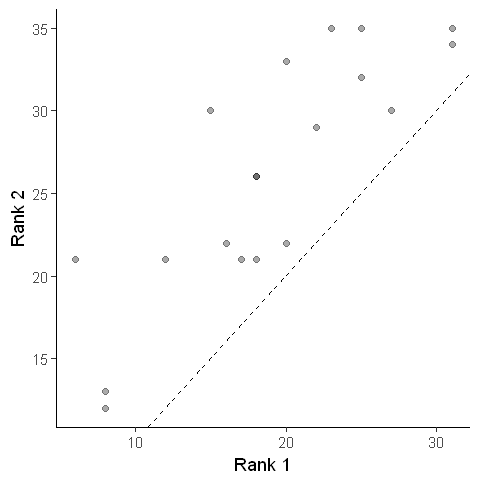

In [42]:
library(ggplot2)
options(repr.plot.width = 4, repr.plot.height = 4)
ggplot(dups.temp) +
    geom_point(
    aes(x = `Rank 1`, y = `Rank 2`), pch = 19, alpha = 1/3) +
    geom_abline(slope = 1, linetype = "dashed") +
    theme_basic()

The points more or less indicate that upward adjustment in recovery rates between the duplicate rows has been a fixed number of percentage points.

## Inspect missingess

In [4]:
lapply(loss.raw, countNA)

$Region
[1] 0

$Business
[1] 0

$Name
[1] 0

$Status
[1] 0

$`Risk Category`
[1] 0

$`Risk Sub-Category`
[1] 0

$`Discovery Date`
[1] 0

$`Occurrence Start Date`
[1] 0

$Year
[1] 0

$`Net Loss`
[1] 0

$`Recovery Amount`
[1] 0

$`Estimated Gross Loss`
[1] 0

$`Recovery Amount (percent)`
[1] 0

No missing values.

## Unique values

In [3]:
lapply(loss.raw, unqSort)

$Region
[1] "Asia Pac"      "EMEA"          "North America"

$Business
[1] "Agency Services"    "Asset Management"   "Commercial Banking"
[4] "Corporate Finance"  "Retail Banking"     "Retail Brokerage"  
[7] "Trading and Sales" 

$Name
   [1] "LE-06-000"  "LE-06-001"  "LE-06-002"  "LE-06-003"  "LE-06-004" 
   [6] "LE-06-005"  "LE-06-006"  "LE-06-007"  "LE-06-008"  "LE-06-009" 
  [11] "LE-06-010"  "LE-06-011"  "LE-06-012"  "LE-06-013"  "LE-06-014" 
  [16] "LE-06-015"  "LE-06-016"  "LE-06-017"  "LE-06-10"   "LE-06-100" 
  [21] "LE-06-101"  "LE-06-102"  "LE-06-103"  "LE-06-104"  "LE-06-105" 
  [26] "LE-06-106"  "LE-06-107"  "LE-06-108"  "LE-06-109"  "LE-06-11"  
  [31] "LE-06-110"  "LE-06-111"  "LE-06-112"  "LE-06-113"  "LE-06-114" 
  [36] "LE-06-115"  "LE-06-116"  "LE-06-117"  "LE-06-118"  "LE-06-119" 
  [41] "LE-06-12"   "LE-06-120"  "LE-06-121"  "LE-06-122"  "LE-06-123" 
  [46] "LE-06-124"  "LE-06-125"  "LE-06-126"  "LE-06-127"  "LE-06-128" 
  [51] "LE-06-129"  "LE-06-13"   "LE-06-130"  "LE-06-131"  "LE-06-132" 
  [56] "LE-06-133"  "LE-06-134"  "LE-06-135"  "LE-06-136"  "LE-06-1364"
  [61] "LE-06-1365" "LE-06-1366" "LE-06-1367" "LE-06-1368" "LE-06-1369"
  [66] "LE-06-137"  "LE-06-1370" "LE-06-1371" "LE-06-1372" "LE-06-1373"
  [71] "LE-06-1374" "LE-06-1375" "LE-06-1376" "LE-06-1377" "LE-06-1378"
  [76] "LE-06-1379" "LE-06-138"  "LE-06-1380" "LE-06-1381" "LE-06-1382"
  [81] "LE-06-1383" "LE-06-139"  "LE-06-14"   "LE-06-140"  "LE-06-141" 
  [86] "LE-06-142"  "LE-06-143"  "LE-06-144"  "LE-06-145"  "LE-06-146" 
  [91] "LE-06-147"  "LE-06-148"  "LE-06-149"  "LE-06-15"   "LE-06-150" 
  [96] "LE-06-151"  "LE-06-152"  "LE-06-153"  "LE-06-154"  "LE-06-155" 
 [101] "LE-06-156"  "LE-06-157"  "LE-06-158"  "LE-06-159"  "LE-06-16"  
 [106] "LE-06-160"  "LE-06-161"  "LE-06-162"  "LE-06-163"  "LE-06-164" 
 [111] "LE-06-165"  "LE-06-166"  "LE-06-167"  "LE-06-168"  "LE-06-169" 
 [116] "LE-06-17"   "LE-06-170"  "LE-06-171"  "LE-06-172"  "LE-06-173" 
 [121] "LE-06-174"  "LE-06-175"  "LE-06-176"  "LE-06-177"  "LE-06-178" 
 [126] "LE-06-179"  "LE-06-18"   "LE-06-180"  "LE-06-181"  "LE-06-182" 
 [131] "LE-06-183"  "LE-06-184"  "LE-06-185"  "LE-06-186"  "LE-06-187" 
 [136] "LE-06-188"  "LE-06-189"  "LE-06-19"   "LE-06-190"  "LE-06-191" 
 [141] "LE-06-192"  "LE-06-193"  "LE-06-194"  "LE-06-195"  "LE-06-196" 
 [146] "LE-06-197"  "LE-06-198"  "LE-06-199"  "LE-06-2"    "LE-06-20"  
 [151] "LE-06-200"  "LE-06-201"  "LE-06-202"  "LE-06-203"  "LE-06-204" 
 [156] "LE-06-205"  "LE-06-206"  "LE-06-207"  "LE-06-208"  "LE-06-209" 
 [161] "LE-06-21"   "LE-06-210"  "LE-06-211"  "LE-06-212"  "LE-06-213" 
 [166] "LE-06-214"  "LE-06-215"  "LE-06-216"  "LE-06-217"  "LE-06-218" 
 [171] "LE-06-219"  "LE-06-22"   "LE-06-220"  "LE-06-221"  "LE-06-222" 
 [176] "LE-06-223"  "LE-06-224"  "LE-06-225"  "LE-06-226"  "LE-06-227" 
 [181] "LE-06-228"  "LE-06-229"  "LE-06-23"   "LE-06-230"  "LE-06-231" 
 [186] "LE-06-232"  "LE-06-233"  "LE-06-234"  "LE-06-235"  "LE-06-236" 
 [191] "LE-06-237"  "LE-06-238"  "LE-06-239"  "LE-06-24"   "LE-06-240" 
 [196] "LE-06-241"  "LE-06-242"  "LE-06-243"  "LE-06-244"  "LE-06-245" 
 [201] "LE-06-246"  "LE-06-247"  "LE-06-248"  "LE-06-249"  "LE-06-25"  
 [206] "LE-06-250"  "LE-06-251"  "LE-06-252"  "LE-06-253"  "LE-06-254" 
 [211] "LE-06-255"  "LE-06-256"  "LE-06-257"  "LE-06-258"  "LE-06-259" 
 [216] "LE-06-26"   "LE-06-260"  "LE-06-261"  "LE-06-262"  "LE-06-263" 
 [221] "LE-06-264"  "LE-06-265"  "LE-06-266"  "LE-06-267"  "LE-06-268" 
 [226] "LE-06-269"  "LE-06-27"   "LE-06-270"  "LE-06-271"  "LE-06-272" 
 [231] "LE-06-273"  "LE-06-274"  "LE-06-275"  "LE-06-276"  "LE-06-277" 
 [236] "LE-06-278"  "LE-06-279"  "LE-06-28"   "LE-06-280"  "LE-06-281" 
 [241] "LE-06-282"  "LE-06-283"  "LE-06-284"  "LE-06-285"  "LE-06-286" 
 [246] "LE-06-287"  "LE-06-288"  "LE-06-289"  "LE-06-29"   "LE-06-290" 
 [251] "LE-06-291"  "LE-06-292"  "LE-06-293"  "LE-06-294"  "LE-06-295" 
 [256] "LE-06-296"  "LE-06-297"  "LE-06-298"  "LE-06-299"  "LE-06-3"   
 [261] "LE-06-30"  

##### Notes on values

* *Estimated Gross Loss* are integers; *Recovery Amount* and *Net Loss* are not

This might mean that the latter two measures have been computed post hoc.

##### Notes on metadata

* *Status* should be a factor
* *Discovery Date* and *Occurrence Start Date* should be Dates
* *Recovery Amount (percent)* is in decimal

In [5]:
library(dplyr)

loss.df <- loss.raw %>% 
    mutate(
        `Discovery Date` = as.Date(`Discovery Date`, origin = "1899-12-30"),
        `Occurrence Start Date` = as.Date(`Occurrence Start Date`, origin = "1899-12-30"),
        Status = factor(
            Status,
            levels = c("Not Started", "In Progress", "Under Review", "Rejected", "Approved")
        )
    )
str(loss.df)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Classes 'tbl_df', 'tbl' and 'data.frame':	1402 obs. of  13 variables:
 $ Region                   : chr  "EMEA" "North America" "Asia Pac" "EMEA" ...
 $ Business                 : chr  "Retail Brokerage" "Retail Banking" "Retail Brokerage" "Retail Banking" ...
 $ Name                     : chr  "LE-06-2" "LE-06-3" "LE-06-4" "LE-06-5" ...
 $ Status                   : Factor w/ 5 levels "Not Started",..: 3 5 1 2 3 5 1 1 4 1 ...
 $ Risk Category            : chr  "Clients, Products and Business Practices" "Execution, Delivery and Process Management" "Clients, Products and Business Practices" "Clients, Products and Business Practices" ...
 $ Risk Sub-Category        : chr  "Product Flaws" "Trade Counterparties" "Advisory Activities" "Product Flaws" ...
 $ Discovery Date           : Date, format: "2007-01-01" "2007-01-03" ...
 $ Occurrence Start Date    : Date, format: "2007-01-02" "2007-01-05" ...
 $ Year                     : chr  "2007" "2007" "2007" "2007" ...
 $ Net Loss              

# Inspect values

## Check if *Year* is redundant

In [8]:
library(lubridate)
library(magrittr)

loss.df %>%
    mutate(
        discovery.year = year(`Discovery Date`),
        occurrence.year = year(`Occurrence Start Date`)
    ) %>%
    group_by(Year, discovery.year, occurrence.year) %>%
    summarise(Rows = n())

Year,discovery.year,occurrence.year,Rows
2007,2007,2007,129
2007,2010,2007,1
2007,2011,2007,1
2008,2008,2008,133
2008,2013,2008,1
2009,2009,2009,139
2010,2010,2010,147
2011,2010,2011,1
2011,2011,2011,151
2011,2013,2011,1


In the cases where *discovery.year* and *occurrence.year* did not match, the *Year* column always matched the value under *occurrence.year*.  Hence, *Year* is determined to be the year of occurrence of the loss event.

In [9]:
loss.df %<>% select(-Year)
str(loss.df)

Classes 'tbl_df', 'tbl' and 'data.frame':	1402 obs. of  12 variables:
 $ Region                   : chr  "EMEA" "North America" "Asia Pac" "EMEA" ...
 $ Business                 : chr  "Retail Brokerage" "Retail Banking" "Retail Brokerage" "Retail Banking" ...
 $ Name                     : chr  "LE-06-2" "LE-06-3" "LE-06-4" "LE-06-5" ...
 $ Status                   : Factor w/ 5 levels "Not Started",..: 3 5 1 2 3 5 1 1 4 1 ...
 $ Risk Category            : chr  "Clients, Products and Business Practices" "Execution, Delivery and Process Management" "Clients, Products and Business Practices" "Clients, Products and Business Practices" ...
 $ Risk Sub-Category        : chr  "Product Flaws" "Trade Counterparties" "Advisory Activities" "Product Flaws" ...
 $ Discovery Date           : Date, format: "2007-01-01" "2007-01-03" ...
 $ Occurrence Start Date    : Date, format: "2007-01-02" "2007-01-05" ...
 $ Net Loss                 : num  296555 87472 229395 137925 292160 ...
 $ Recovery Amount 

## Mismatch between *discovery year* and *occurrence year*

In [47]:
# Filter entries whose discovery year and occurrence year do not mathc
loss.df %>% filter(year(`Discovery Date`) != year(`Occurrence Start Date`)) %>% arrange(`Occurrence Start Date`)

Region,Business,Name,Status,Risk Category,Risk Sub-Category,Discovery Date,Occurrence Start Date,Estimated Gross Loss,Recovery Amount,Net Loss,Recovery Rate
EMEA,Retail Banking,LE-06-685,In Progress,"Execution, Delivery and Process Management",Customer Intake and Documentation,2011-12-30,2007-01-02,223300,44660,178640,0.20
North America,Retail Banking,LE-06-451,Not Started,Internal Fraud,Theft and Fraud,2010-06-04,2007-04-04,700000,175000,525000,0.25
North America,Retail Banking,LE-06-013,Not Started,Internal Fraud,Theft and Fraud,2013-06-04,2008-04-04,700000,140000,560000,0.20
North America,Retail Brokerage,LE-06-407,Not Started,Employment Practices and Workplace Safety,Diversity and Discrimination,2010-02-07,2011-02-04,300000,120000,180000,0.40
North America,Retail Brokerage,LE-06-014,Not Started,Employment Practices and Workplace Safety,Diversity and Discrimination,2013-02-07,2011-02-04,300000,60000,240000,0.20
North America,Retail Banking,z-LE-131,Under Review,External Fraud,Systems Security,2011-12-29,2012-01-01,130600,45710,84890,0.35
EMEA,Retail Banking,z-LE-132,Rejected,External Fraud,Theft and Fraud,2011-12-30,2012-01-02,23500,8225,15275,0.35
EMEA,Retail Banking,z-LE-274,In Progress,"Execution, Delivery and Process Management",Customer Intake and Documentation,2012-12-30,2013-01-02,223300,49126,174174,0.22


There are 9 entries whose discovery year and occurrence year did not match; among which 4 have been discovered before occurring.

This means that 5 loss events would have caused retroactive adjustments to operational loss figures.

## Disambiguate imbalance between *Estimated Gross Loss* with *Recovery Amount* and *Net Loss*

Supposedly:

> *Net Loss* = *Estimated Gross Loss* - *Recovery Amount*

However, since this equation clearly does not hold in the data, there is ambiguity on how *Gross Loss* and *Net Loss* relate to one another.

In [13]:
### Check computation for recovery amount

loss.df %>%
    mutate(
        Recovery.Rate = `Recovery Amount` / `Net Loss`
    ) %>%
    select(Recovery.Rate, `Recovery Amount (percent)`) %>%
    arrange(Recovery.Rate) %>%
    distinct()

Recovery.Rate,Recovery Amount (percent)
0.05,5
0.06,6
0.07,7
0.08,8
0.08,8
0.09,9
0.10,10
0.12,12
0.12,12
0.13,13


*Recovery.Rate* and *Recovery Amount (percent)* are identical.

Hence, *Recovery Amount (percent)* must be the actual recovery rate, whilst *Net Loss* is a sanitation of the *Estimated Gross Loss* column.  *Recovery Amount* must have then be the supposed recovery amount if the same recovery rate was applied on the allegedly simulated *Net Loss* (which should actually be a simulated gross loss).

In [14]:
loss.df %<>% 
    select(-`Net Loss`, -`Recovery Amount`) %>% ## Remove artificial variables
    mutate(
        ## Backsolve alleged original values
        `Recovery Amount` = `Estimated Gross Loss` * `Recovery Amount (percent)` / 100
    ) %>% 
    select(-`Recovery Amount (percent)`) %>% ## Redundant column
    ## Compute RAPM
    mutate(
        `Net Loss` = `Estimated Gross Loss` - `Recovery Amount`,
        `Recovery Rate` = `Recovery Amount` / `Estimated Gross Loss`
    )
str(loss.df)

Classes 'tbl_df', 'tbl' and 'data.frame':	1402 obs. of  12 variables:
 $ Region               : chr  "EMEA" "North America" "Asia Pac" "EMEA" ...
 $ Business             : chr  "Retail Brokerage" "Retail Banking" "Retail Brokerage" "Retail Banking" ...
 $ Name                 : chr  "LE-06-2" "LE-06-3" "LE-06-4" "LE-06-5" ...
 $ Status               : Factor w/ 5 levels "Not Started",..: 3 5 1 2 3 5 1 1 4 1 ...
 $ Risk Category        : chr  "Clients, Products and Business Practices" "Execution, Delivery and Process Management" "Clients, Products and Business Practices" "Clients, Products and Business Practices" ...
 $ Risk Sub-Category    : chr  "Product Flaws" "Trade Counterparties" "Advisory Activities" "Product Flaws" ...
 $ Discovery Date       : Date, format: "2007-01-01" "2007-01-03" ...
 $ Occurrence Start Date: Date, format: "2007-01-02" "2007-01-05" ...
 $ Estimated Gross Loss : num  291100 98400 230700 137400 288300 ...
 $ Recovery Amount      : num  81508 30504 59982 34350 

In [16]:
loss.df

Region,Business,Name,Status,Risk Category,Risk Sub-Category,Discovery Date,Occurrence Start Date,Estimated Gross Loss,Recovery Amount,Net Loss,Recovery Rate
EMEA,Retail Brokerage,LE-06-2,Under Review,"Clients, Products and Business Practices",Product Flaws,2007-01-01,2007-01-02,291100,81508,209592,0.28
North America,Retail Banking,LE-06-3,Approved,"Execution, Delivery and Process Management",Trade Counterparties,2007-01-03,2007-01-05,98400,30504,67896,0.31
Asia Pac,Retail Brokerage,LE-06-4,Not Started,"Clients, Products and Business Practices",Advisory Activities,2007-01-04,2007-01-06,230700,59982,170718,0.26
EMEA,Retail Banking,LE-06-5,In Progress,"Clients, Products and Business Practices",Product Flaws,2007-01-08,2007-01-11,137400,34350,103050,0.25
North America,Trading and Sales,LE-06-6,Under Review,"Execution, Delivery and Process Management",Reporting and Disclosure,2007-01-12,2007-01-14,288300,89373,198927,0.31
North America,Retail Brokerage,LE-06-7,Approved,"Clients, Products and Business Practices",Advisory Activities,2007-01-16,2007-01-19,321700,70774,250926,0.22
North America,Retail Banking,LE-06-8,Not Started,External Fraud,Theft and Fraud,2007-01-19,2007-01-22,257500,54075,203425,0.21
North America,Trading and Sales,LE-06-9,Not Started,"Clients, Products and Business Practices","Suitability, Disclosures and Fiduciary",2007-01-21,2007-01-23,546600,185844,360756,0.34
Asia Pac,Retail Banking,LE-06-10,Rejected,Employment Practices and Workplace Safety,Diversity and Discrimination,2007-01-29,2007-01-30,197000,63040,133960,0.32
North America,Retail Banking,LE-06-11,Not Started,External Fraud,Systems Security,2007-01-30,2007-01-31,3000,1050,1950,0.35


## Deduplicate rows

In [69]:
Loss.df <- loss.df %>%
    group_by(Name) %>%
    filter(`Recovery Amount` == max(`Recovery Amount`)) %>% # Get largest recovery amount
    ungroup()
str(Loss.df)

Classes 'tbl_df', 'tbl' and 'data.frame':	1383 obs. of  12 variables:
 $ Region               : chr  "EMEA" "North America" "Asia Pac" "EMEA" ...
 $ Business             : chr  "Retail Brokerage" "Retail Banking" "Retail Brokerage" "Retail Banking" ...
 $ Name                 : chr  "LE-06-2" "LE-06-3" "LE-06-4" "LE-06-5" ...
 $ Status               : Factor w/ 5 levels "Not Started",..: 3 5 1 2 3 5 1 1 4 1 ...
 $ Risk Category        : chr  "Clients, Products and Business Practices" "Execution, Delivery and Process Management" "Clients, Products and Business Practices" "Clients, Products and Business Practices" ...
 $ Risk Sub-Category    : chr  "Product Flaws" "Trade Counterparties" "Advisory Activities" "Product Flaws" ...
 $ Discovery Date       : Date, format: "2007-01-01" "2007-01-03" ...
 $ Occurrence Start Date: Date, format: "2007-01-02" "2007-01-05" ...
 $ Estimated Gross Loss : num  291100 98400 230700 137400 288300 ...
 $ Recovery Amount      : num  81508 30504 59982 34350 

In [71]:
# Check if duplicate rows still exist
Loss.df %>% group_by(Name) %>% mutate(nrow = n()) %>% filter(nrow > 1) %>% arrange(Name)

Region,Business,Name,Status,Risk Category,Risk Sub-Category,Discovery Date,Occurrence Start Date,Estimated Gross Loss,Recovery Amount,Net Loss,Recovery Rate,nrow
EMEA,Retail Banking,z-LE-293,Approved,"Execution, Delivery and Process Management",Vendors and Suppliers,2013-02-18,2013-02-21,42800,7276,35524,0.17,2
EMEA,Retail Banking,z-LE-293,Approved,"Execution, Delivery and Process Management",Vendors and Suppliers,2013-02-18,2013-02-21,42800,7276,35524,0.17,2


One duplicate row with exactly the same entries.

In [72]:
Loss.df %<>% distinct()
str(Loss.df)

Classes 'tbl_df', 'tbl' and 'data.frame':	1382 obs. of  12 variables:
 $ Region               : chr  "EMEA" "North America" "Asia Pac" "EMEA" ...
 $ Business             : chr  "Retail Brokerage" "Retail Banking" "Retail Brokerage" "Retail Banking" ...
 $ Name                 : chr  "LE-06-2" "LE-06-3" "LE-06-4" "LE-06-5" ...
 $ Status               : Factor w/ 5 levels "Not Started",..: 3 5 1 2 3 5 1 1 4 1 ...
 $ Risk Category        : chr  "Clients, Products and Business Practices" "Execution, Delivery and Process Management" "Clients, Products and Business Practices" "Clients, Products and Business Practices" ...
 $ Risk Sub-Category    : chr  "Product Flaws" "Trade Counterparties" "Advisory Activities" "Product Flaws" ...
 $ Discovery Date       : Date, format: "2007-01-01" "2007-01-03" ...
 $ Occurrence Start Date: Date, format: "2007-01-02" "2007-01-05" ...
 $ Estimated Gross Loss : num  291100 98400 230700 137400 288300 ...
 $ Recovery Amount      : num  81508 30504 59982 34350 

In [73]:
# Check if duplicate rows still exist
Loss.df %>% group_by(Name) %>% mutate(nrow = n()) %>% filter(nrow > 1) %>% arrange(Name)

Region,Business,Name,Status,Risk Category,Risk Sub-Category,Discovery Date,Occurrence Start Date,Estimated Gross Loss,Recovery Amount,Net Loss,Recovery Rate,nrow


# Stage parsed data

## Cache parsed data locally

In [18]:
data01.file <- "data01_parsed ingest.rds"
data01.path <- file.path("../Data", data01.file)

loss.df %>% saveRDS(data01.path)

## Upload cached parsed data

In [19]:
# Initialise paths
(paths.ls <- readRDS("paths.rds"))

# Upload
library(googledrive)
drive_auth() ## Authenticate session with GDrive
dump01.path <- file.path(paths.ls$datastage.prod, data01.file)
drive_upload(data01.path, dump01.path)

$local
[1] "./IBM Watson/Banking Loss Events"

$prod
[1] "~/Data/DataLake/IBM Watson/Banking Loss Events"

$datastage.local
[1] "./IBM Watson/Banking Loss Events/Data"

$datastage.prod
[1] "~/Data/DataLake/IBM Watson/Banking Loss Events/data"

Waiting for authentication in browser...
Press Esc/Ctrl + C to abort
Please point your browser to the following url: 
https://accounts.google.com/o/oauth2/auth?client_id=603366585132-nku3fbd298ma3925l12o2hq0cc1v8u11.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&redirect_uri=http%3A%2F%2Flocalhost%3A1410%2F&response_type=code&state=FjkXocSWt6
Authentication complete.
Local file:
  * ../Data/data01_parsed ingest.rds
uploaded into Drive file:
  * data01_parsed ingest.rds: 1GB8wcspcaBwh4ea9FUfCsCrIKQMutQ6N
with MIME type:
  * application/x-gzip


## Cache deduped data locally

In [76]:
data02.file <- "data02_deduped ingest.rds"
data02.path <- file.path("../Data", data02.file)

Loss.df %>% saveRDS(data02.path)

## Upload cached deduped data

In [77]:
drive_auth() ## Authenticate session with GDrive
dump02.path <- file.path(paths.ls$datastage.prod, data02.file)
drive_upload(data02.path, dump02.path)

Waiting for authentication in browser...
Press Esc/Ctrl + C to abort
Please point your browser to the following url: 
https://accounts.google.com/o/oauth2/auth?client_id=603366585132-nku3fbd298ma3925l12o2hq0cc1v8u11.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&redirect_uri=http%3A%2F%2Flocalhost%3A1410%2F&response_type=code&state=sh1e6jKZeZ
Authentication complete.
Local file:
  * ../Data/data02_deduped ingest.rds
uploaded into Drive file:
  * data02_deduped ingest.rds: 1w-hLij8U0h5-xLwqjDE0UoY7aH77eWLo
with MIME type:
  * application/x-gzip


# Determine reporting frequency

In [50]:
library(lubridate)

dates.df <- loss.df %>% mutate(Year = year(`Occurrence Start Date`)) %>% distinct(Year, Region, Business, `Occurrence Start Date`)
str(dates.df)

Classes 'tbl_df', 'tbl' and 'data.frame':	1310 obs. of  4 variables:
 $ Region               : chr  "EMEA" "North America" "Asia Pac" "EMEA" ...
 $ Business             : chr  "Retail Brokerage" "Retail Banking" "Retail Brokerage" "Retail Banking" ...
 $ Occurrence Start Date: Date, format: "2007-01-02" "2007-01-05" ...
 $ Year                 : num  2007 2007 2007 2007 2007 ...


In [66]:
library(tidyr)

dates.df %>% 
    group_by(Region, Business) %>% 
    arrange(`Occurrence Start Date`) %>% 
    mutate(
        lagDate = lag(`Occurrence Start Date`),
        loss.lapse = `Occurrence Start Date` - lagDate
    ) %>%
    ungroup() %>% 
    group_by(Year, Region, Business) %>% 
    summarise(lapse = median(loss.lapse, na.rm = TRUE)) %>% # NAs may be due to lack of event in that year
    group_by(Region, Business) %>%
    summarise(lapse = mean(lapse, na.rm = TRUE)) %>% # summarise across years
    # display
    mutate(lapse = round(lapse)) %>%
    spread("Region", "lapse")

Business,Asia Pac,EMEA,North America
Agency Services,261 days,277 days,228 days
Asset Management,346 days,392 days,187 days
Commercial Banking,131 days,78 days,39 days
Corporate Finance,2192 days,238 days,115 days
Retail Banking,13 days,8 days,6 days
Retail Brokerage,382 days,157 days,81 days
Trading and Sales,59 days,43 days,26 days


Based on wait times/inter-arrival times in table above, global policy on OpRisk reporting frequency might look like this:

| Business | Frequency |
|:--|:-:|
| Agency Service | annual |
| Asset Management |  annual |
| Commercial Banking |  quarterly |
| Corporate Finance |  semi-annual |
| Retail Banking |  monthly |
| Retail Brokerage |  semi-annual |
| Trading and Sales |  quarterly |